# Validación Cruzada

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine

In [2]:
# Cargar el conjunto de datos de Wine
data = load_wine() # Se cambia el dataset a los vinos 
X = data.data
y = data.target

In [3]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Validación cruzada con K-fold
model = RandomForestClassifier(random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

In [5]:
print(f"Resultados de CV: {cv_scores}")
print(f"Promedio de CV: {cv_scores.mean()}")

Resultados de CV: [1.         1.         0.92857143 0.96428571 1.        ]
Promedio de CV: 0.9785714285714286


### Conclusión de los resultados Validación Cruzada

El promedio entre los CV es de 0.9785714285714286. Tres de los cinco folds de Validación Cruzada alcanzan 100% de precisión, por lo que se muestra que el modelo tiene una precisión muy alta. También la variabilidad es baja ya que es consistente entre particiones. 

# Matriz de Confusión

In [6]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [7]:
# Entrenamiento del modelo en todo el conjunto de datos de entrenamiento
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [8]:
# Predicción de las etiquetas del conjunto de prueba
y_pred = model.predict(X_test)

In [9]:
# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)

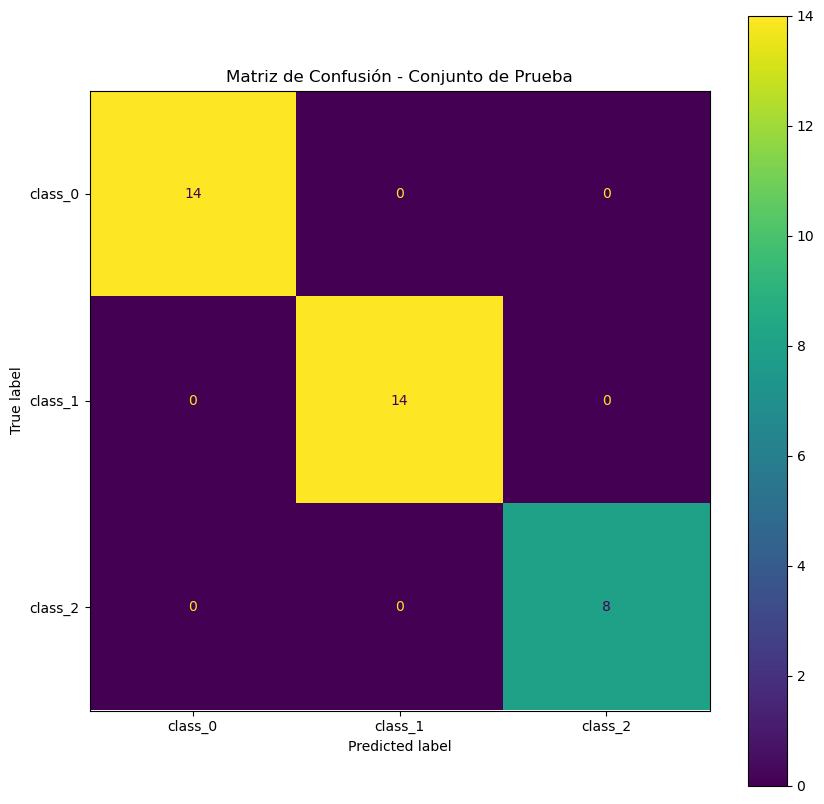

In [10]:
# Visualizar la matriz de confusión
fig, ax = plt.subplots(figsize=(10, 10))
disp.plot(ax=ax)
plt.title('Matriz de Confusión - Conjunto de Prueba')
plt.show()

In [11]:
cm

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]], dtype=int64)

### Conclusión de los resultados Matriz de Confusión

La matriz de confusión muestra que el modelo tiene un rendimiento excelente en la clasificación de las tres clases del conjunto de datos de Wine

# Métricas de evaluación de modelos

In [12]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [13]:
# Cargar el conjunto de datos de Wine
data = load_wine()
X = data.data
y = data.target

In [14]:
# Dividir los datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [15]:
# Entrenamiento del modelo y cálculo de métricas
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [16]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')

In [17]:
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0


### Conclusión de los resultados Métricas de evaluación de modelos

Estos resultados indican que el modelo tiene un rendimiento perfecto en el conjunto de datos de prueba, lo que sugiere que el modelo ha clasificado correctamente todas las instancias sin ningún error. 